In [1]:
# This script will create a table like this:
#|dataset_id|d_creation_date|d_last_modification_date|first_access_day|
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from algorithmUtils import *

In [13]:
def plot_deltas(days_path, dataset_dates_df, datatier, save):
    dataset_first_access = dict()
    # For each of the days
    for day in days_df.day_ts.values:
        # For each of the datasets accessed in a given day
        for dataset in days_df[days_df['day_ts'] == day].datasets_set.values[0]:
            # If the dataset is not in our dictionary that means this 'day' is
            # the first recorded access to that dataset
            if dataset not in dataset_first_access:
                dataset_first_access[dataset]=day
    # Create a pandas DataFrame 'first_access_df' from the Dictionary 'dataset_first_access'
    first_access_df = pd.DataFrame(data=dataset_first_access.items(), columns=["d_dataset_id", "first_access_day"])
    # Concatenate the columns in both 'dataset_dates_df' and 'first_access_df' when both records
    # have the same dataset ID (d_dataset_id) 
    all_dates = pd.merge(dataset_dates_df, first_access_df, how="inner", on="d_dataset_id")
    all_dates
    if all_dates.isnull().values.any() == True:
        print("ERROR: There are NaNs after merge")
     
    # Calculate delta between first access and creation and last_modification dates
    all_dates['creation_delta_days'] = (all_dates['first_access_day'] - all_dates['d_creation_date'])/(3600*24)
    all_dates = all_dates[all_dates['creation_delta_days']<0]
    all_dates['modification_delta_days'] = (all_dates['first_access_day'] - all_dates['d_last_modification_date'])/(3600*24)
    all_dates

    # Create plots
    ##fig1 = plt.figure(figsize=(10,5))
    #plt.hist('modification_delta_days', bins=100, data=all_dates)
    #fig1.suptitle("Modification delta - "+datatier, fontsize=20)
    #plt.ylabel('Datasets count', fontsize=15)
    #plt.xlabel('Days between first access and last_modification date', fontsize=15)
    
    fig2 = plt.figure(figsize=(10,5))
    plt.hist('creation_delta_days', bins=100, data=all_dates)
    fig2.suptitle("Earlier accesses - "+datatier, fontsize=20)
    plt.ylabel('Datasets count', fontsize=15)
    plt.xlabel('Days between first access and creation date', fontsize=15)


    
    if save == True:
        #filename1= "/Users/ddavila/projects/DOMA/analytics_tools/models/doc/figures/delta_modification_"+datatier+".png"
        filename2= "/Users/ddavila/projects/DOMA/analytics_tools/models/doc/figures/earlier_access_"+datatier+".png"
        #fig1.savefig(filename1)
        fig2.savefig(filename2)

In [2]:
basepath="/Users/ddavila/projects/DOMA/data/model/"
datasets_size_path = basepath+"dataset.parquet"


Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201904_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201903_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201810_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201902_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201905_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201811_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201809_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201808_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201806_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/data_tier_days_201901_NANO.parquet
Reading: /Users/ddavila/projects/DOMA/data/model/datatiers/d

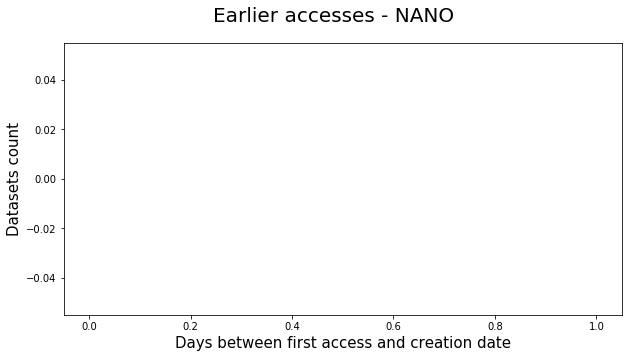

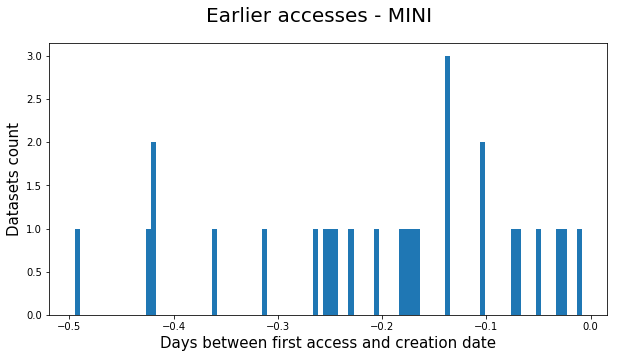

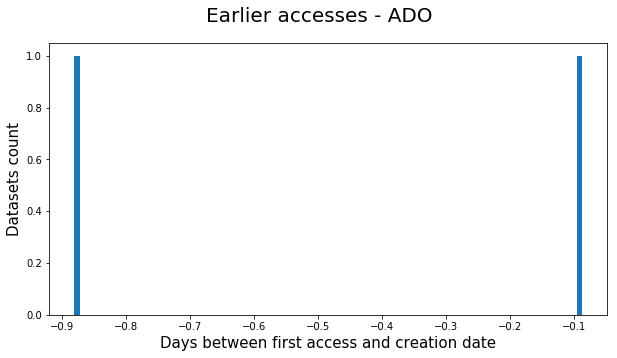

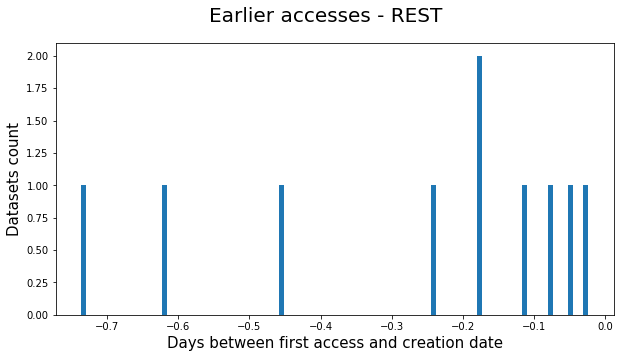

In [14]:
for datatier in ["NANO", "MINI", "ADO", "REST"]:
#for datatier in ["NANO"]:
    dataset_dates_path = basepath + "dataset_dates_"+datatier+".parquet"
    dataset_dates_df = pd.read_parquet(dataset_dates_path)
    # Remove all datasets that were created before May 31st, 2018
    # because we start taking data on June 1st, 2018
    dataset_dates_df= dataset_dates_df[dataset_dates_df['d_creation_date'] > 1527724800]
    days_path= basepath+"datatiers/data_tier_days_*_"+datatier+".parquet"
    days_df, _, _ = get_input_data_old(days_path, datasets_size_path)
    plot_deltas(days_df, dataset_dates_df, datatier, True)
    

In [ ]:
  dataset_first_access = dict()
    # For each of the days
    for day in days_df.day_ts.values:
        # For each of the datasets accessed in a given day
        for dataset in days_df[days_df['day_ts'] == day].datasets_set.values[0]:
            # If the dataset is not in our dictionary that means this 'day' is
            # the first recorded access to that dataset
            if dataset not in dataset_first_access:
                dataset_first_access[dataset]=day
    # Create a pandas DataFrame 'first_access_df' from the Dictionary 'dataset_first_access'
    first_access_df = pd.DataFrame(data=dataset_first_access.items(), columns=["d_dataset_id", "first_access_day"])
    # Concatenate the columns in both 'dataset_dates_df' and 'first_access_df' when both records
    # have the same dataset ID (d_dataset_id) 
    all_dates = pd.merge(dataset_dates_df, first_access_df, how="right", on="d_dataset_id")
    if all_dates.isnull().values.any() == True:
        print("ERROR: There are NaNs after merge")
     
    # Calculate delta between first access and creation and last_modification dates
    all_dates['creation_delta_days'] = (all_dates['first_access_day'] - all_dates['creation_day_ts'])/(3600*24) 
    #all_dates['modification_delta_days'] = (all_dates['first_access_day'] - all_dates['d_last_modification_date'])/(3600*24)
    all_dates[['d_creation_date', 'first_access_day', 'creation_delta_days']].values[0][0]

In [ ]:
   all_dates[['d_creation_date', 'first_access_day', 'creation_delta_days']].values[0][1]

In [ ]:
    #all_dates[['d_creation_date', 'first_access_day', 'creation_delta_days']].values[0][2]
    all_dates.head(5)

In [ ]:
 all_dates_50 = all_dates[all_dates['creation_delta_days'] < 100]
    

In [ ]:
all_dates_50[all_dates_50['creation_delta_days'] == 0.0].count()


In [ ]:
    # Create plots
    #fig1 = plt.figure(figsize=(10,5))
    #plt.hist('modification_delta_days', bins=100, data=all_dates)
    #fig1.suptitle("Modification delta - "+datatier, fontsize=20)
    #plt.ylabel('Datasets count', fontsize=15)
    #plt.xlabel('Days between first access and last_modification date', fontsize=15)
    
    fig2 = plt.figure(figsize=(10,5))
    plt.hist('creation_delta_days', bins=100, data=all_dates_50)
    fig2.suptitle("Creation delta first 100 - "+datatier, fontsize=20)
    plt.ylabel('Datasets count', fontsize=15)
    plt.xlabel('Days between first access and creation date', fontsize=15)

In [ ]:
filename2= "/Users/ddavila/projects/DOMA/analytics_tools/models/doc/figures/delta_creation_MINI_100.png"
fig2.savefig(filename2)